In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML Project/Employee-Attrition-Analysis-master/HR-Employee-Attrition.csv')

In [ ]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Check for Missing Values

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Drop Irrelevant Columns

In [ ]:
irrelevant_columns = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
data_cleaned = data.drop(columns=irrelevant_columns, errors='ignore')

# Encode Categorical Variables

In [ ]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)


# Normalize Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Split Data into Features and Target

In [ ]:
X = data_encoded.drop(columns=['Attrition_Yes'])
y = data_encoded['Attrition_Yes']

# Split into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.10645393691259279
R² Score: 0.07476596370267763


# Finding Accuracy for Linear Regression

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]


training_accuracy = accuracy_score(y_train, y_train_pred_binary)
print("Training Accuracy:", training_accuracy)

testing_accuracy = accuracy_score(y_test, y_test_pred_binary)
print("Testing Accuracy:", testing_accuracy)


Training Accuracy: 0.8792517006802721
Testing Accuracy: 0.8741496598639455


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred_binary)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       255
        True       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294



# Confusion Matrix

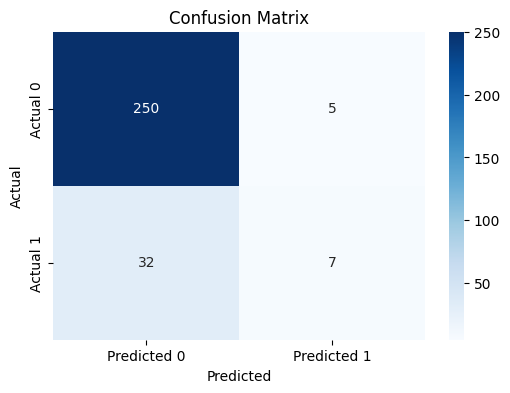

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# **Logistic Regression Model**

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

# Make Predictions on Training and Testing Data

In [ ]:
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

# Calculate and Print Accuracy for Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8928571428571429
Testing Accuracy: 0.8877551020408163


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       255
        True       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



# Confusion Matrix

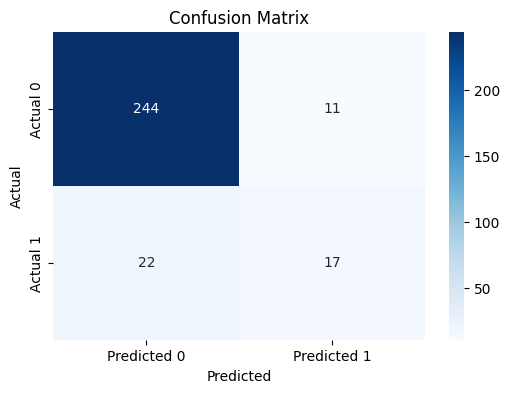

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# **Random Forest Classifier**

# Train the Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make Predictions on Training and Testing Data

In [ ]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Accuracy for Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest - Training Accuracy:", train_accuracy_rf)
print("Random Forest - Testing Accuracy:", test_accuracy_rf)

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.8775510204081632


# Classification Report

In [ ]:
report_rf = classification_report(y_test, y_test_pred_rf)

print("Random Forest - Classification Report:")
print(report_rf)

Random Forest - Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



# Confusion Matrix

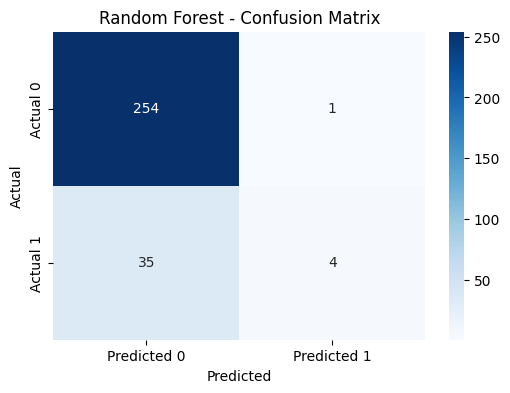

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# **Decision Tree Classifier**

# Train the Decision Tree Model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Make Predictions on Training and Testing Data

In [ ]:
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Accuracy for Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree - Training Accuracy:", train_accuracy_dt)
print("Decision Tree - Testing Accuracy:", test_accuracy_dt)

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.7551020408163265


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

report_dt = classification_report(y_test, y_test_pred_dt)

print("Decision Tree - Classification Report:")
print(report_dt)

Decision Tree - Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.84      0.86       255
        True       0.15      0.18      0.16        39

    accuracy                           0.76       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.77      0.76      0.76       294



# Confusion Matrix

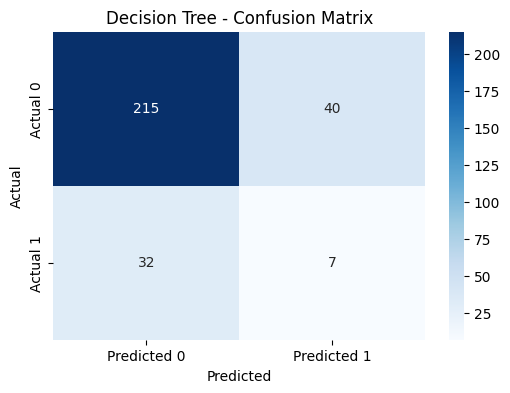

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# **KNN**

# Train the KNN Model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Predictions on Training and Testing Data

In [ ]:
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Accuracy for Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print("KNN - Training Accuracy:", train_accuracy_knn)
print("KNN - Testing Accuracy:", test_accuracy_knn)

KNN - Training Accuracy: 0.8673469387755102
KNN - Testing Accuracy: 0.8673469387755102


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

report_knn = classification_report(y_test, y_test_pred_knn)

print("KNN - Classification Report:")
print(report_knn)

KNN - Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       255
        True       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294



# Confusion Matrix

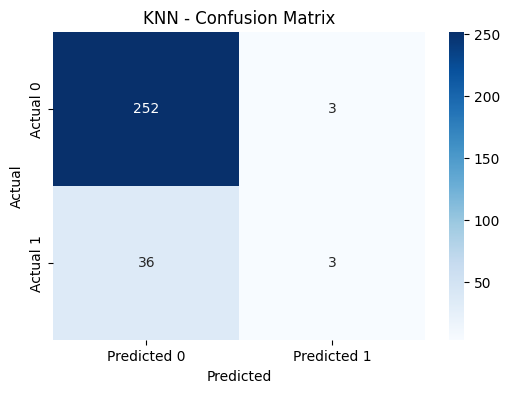

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# **Naive Bayes Classifier**

# Train the Naive Bayes Model

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

# Make Predictions on Training and Testing Data

In [ ]:
y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

# Calculate and Print Accuracy for Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print("Naive Bayes - Training Accuracy:", train_accuracy_nb)
print("Naive Bayes - Testing Accuracy:", test_accuracy_nb)

Naive Bayes - Training Accuracy: 0.6794217687074829
Naive Bayes - Testing Accuracy: 0.6904761904761905


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

report_nb = classification_report(y_test, y_test_pred_nb)

print("Naive Bayes - Classification Report:")
print(report_nb)

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.69      0.80       255
        True       0.25      0.67      0.36        39

    accuracy                           0.69       294
   macro avg       0.59      0.68      0.58       294
weighted avg       0.84      0.69      0.74       294



# Confusion Matrix

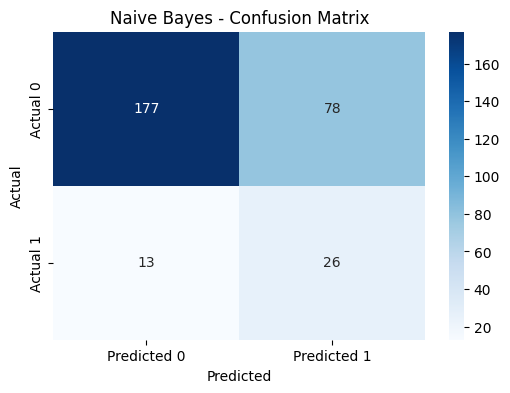

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# **SVM**

# Train the SVM Model

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Make Predictions on Training and Testing Data

In [ ]:
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Accuracy for Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print("SVM - Training Accuracy:", train_accuracy_svm)
print("SVM - Testing Accuracy:", test_accuracy_svm)

SVM - Training Accuracy: 0.8928571428571429
SVM - Testing Accuracy: 0.8877551020408163


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

report_svm = classification_report(y_test, y_test_pred_svm)

print("SVM - Classification Report:")
print(report_svm)

SVM - Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94       255
        True       0.62      0.41      0.49        39

    accuracy                           0.89       294
   macro avg       0.76      0.69      0.71       294
weighted avg       0.87      0.89      0.88       294



# Confusion Matrix

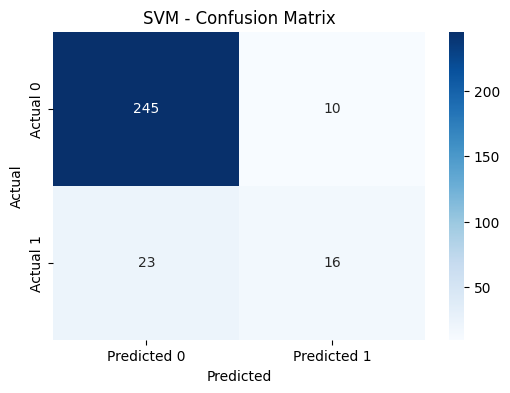

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7419 - loss: 0.5569
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8404 - loss: 0.4009
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8554 - loss: 0.3763
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.3198
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3129
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.2823
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2617
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9069 - loss: 0.2696
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9032 - loss: 0.2395
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9183 - loss: 0.2318


In [ ]:
y_pred_ann = model.predict(X_test)
y_pred_ann_binary = (y_pred_ann > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
report_ann = classification_report(y_test, y_pred_ann_binary)
print("ANN - Classification Report:")
print(report_ann)

ANN - Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94       255
        True       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



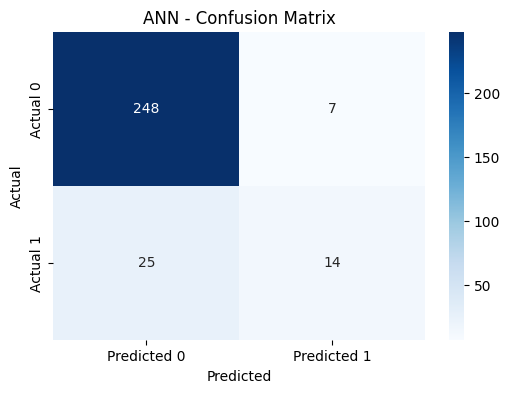

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_ann = confusion_matrix(y_test, y_pred_ann_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('ANN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()